In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"D:\Downloads\FLH.csv")

In [6]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_name_id
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,John_2787
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,Jennifer_2845
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Elisabeth_4632
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,LisaRoxanne_4869
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,Laura_7192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,Sabrina_8232441
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,Marisol_6570630
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,Ilgar & Aysel_23492952
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,Taz_30985759


In [5]:
data['host_name_id'] = data['host_name']+'_'+data['host_id'].astype(str)

In [4]:
data.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**In pandas, the .unique() method is used to return unique values of a column in a DataFrame or Series. It returns a NumPy array of the unique values.**

In [93]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [94]:
data.isnull().sum()

id                                 0
name                               6
host_id                            0
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
price_range                       10
date                               0
month                              0
dtype: int64

**FROM ABOVE FINDING IT IS EVIDENT THAT THE COLUMN 'NAME','HOST_NAME','PRICE_RANGE' CONTAINS NULL VALUES WE HAVE TO HANDLE THESE VALUES BY PREPROCESSIG THE DATA**

In [95]:
data['name'].fillna('Unknown')

data['host_name'].fillna('Unknown')

0                      Clean & quiet apt home by the park
1                                   Skylit Midtown Castle
3                         Cozy Entire Floor of Brownstone
4        Entire Apt: Spacious Studio/Loft by central park
5               Large Cozy 1 BR Apartment In Midtown East
                               ...                       
48782          Lovely Privet Bedroom with Privet Restroom
48790                            No.2 with queen size bed
48799                                     Seas The Moment
48805                       1B-1B apartment near by Metro
48852             Cozy Private Room in Bushwick, Brooklyn
Name: name, Length: 38843, dtype: object

In [113]:
# Calculate the average price for each room type
average_price_per_room_type = data.groupby('room_type')['price'].mean()

# Fill the null values in the price column with the average price of the corresponding room type

data.loc[data['price'].isnull(), 'price'] = data.loc[data['price'].isnull(), 'room_type'].map(average_price_per_room_type)


# Verify the result
print("Null values in 'price' column after filling:")
print(data['price'].isnull().sum())

Null values in 'price' column after filling:
0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38843 non-null  int64         
 1   name                            38837 non-null  object        
 2   host_id                         38843 non-null  int64         
 3   host_name                       38827 non-null  object        
 4   neighbourhood_group             38843 non-null  object        
 5   neighbourhood                   38843 non-null  object        
 6   latitude                        38843 non-null  float64       
 7   longitude                       38843 non-null  float64       
 8   room_type                       38843 non-null  object        
 9   price                           38843 non-null  int64         
 10  minimum_nights                  38843 non-null  int64         
 11  nu

In [115]:
data['neighbourhood'].value_counts()

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2206
Bushwick              1944
Hell's Kitchen        1532
                      ... 
Eltingville              2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

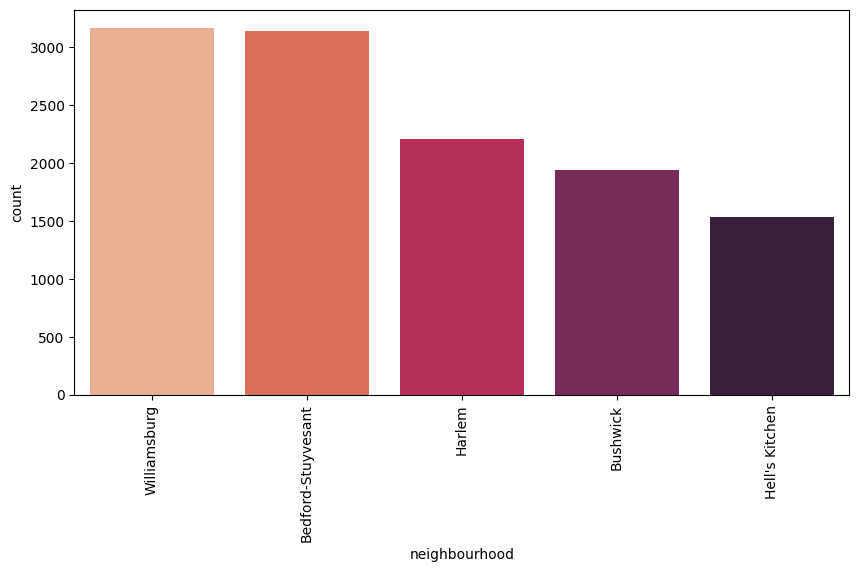

In [120]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'neighbourhood', data = data, palette = 'rocket_r', order = data['neighbourhood'].value_counts().head(5).index)
plt.xticks(rotation = 90)
plt.show()

In [122]:
map_ = data.groupby(["latitude", "longitude"])["neighbourhood_group"].count().reset_index()
map_.columns=["Lat", "Lon", "neighbourhood_group"]
map_sort = map_.sort_values(by="neighbourhood_group", ascending=False)
map_sort

,Lat,Lon,neighbourhood_group
13109,40.70125,-73.91051,2
30704,40.76914,-73.98757,2
19981,40.72347,-73.99302,2
7843,40.68398,-73.94101,2
26035,40.74882,-73.97788,2
...,...,...,...
12941,40.70044,-73.93909,1
12942,40.70044,-73.92503,1
12943,40.70044,-73.92430,1
12944,40.70045,-73.98468,1


**To create heatmap on the map we need use FOLIUM library hence Import Folium Library**

In [127]:
!pip install folium

import folium



     -------------------------------------- 108.4/108.4 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 83.9/83.9 kB ? eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: C:\Users\udeva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [128]:
from folium.plugins import HeatMap
import folium
basemap=folium.Map()
HeatMap(map_sort[:100]).add_to(basemap)
basemap

**What are the neighborhoods that FLH needs to target?**



In [12]:
# Grouping by neighborhood and calculating the required metrics
neighborhood_analysis = data.groupby('neighbourhood').agg({
    'id': 'count',  # Number of listings
    'price': 'mean',  # Average price
    'number_of_reviews': 'sum',  # Total number of reviews
    'availability_365': 'mean'  # Average availability
}).reset_index()

In [13]:

neighborhood_analysis.rename(columns={
    'id': 'number_of_listings',
    'price': 'average_price',
    'number_of_reviews': 'total_reviews',
    'availability_365': 'average_availability'
}, inplace=True)

In [14]:
map_1 = data.groupby(["latitude", "longitude"])["neighbourhood"].count().reset_index()
map_1.columns=["Lat", "Lon", "neighbourhood"]
map_sort1 = map_1.sort_values(by="neighbourhood", ascending=False)
map_sort1

,Lat,Lon,neighbourhood
19823,40.71232,-73.94220,3
32460,40.74882,-73.97788,2
40495,40.77874,-73.98437,2
21439,40.71603,-73.96417,2
38879,40.76989,-73.94961,2
...,...,...,...
16292,40.70313,-73.91451,1
16293,40.70314,-73.93656,1
16294,40.70315,-73.99424,1
16295,40.70315,-73.93124,1


In [15]:
from folium.plugins import HeatMap
import folium
basemap=folium.Map()
HeatMap(map_sort1[:100]).add_to(basemap)
basemap

In [17]:
# Sorting by the number of listings to identify popular neighborhoods
popular_neighborhoods = neighborhood_analysis.sort_values(by='number_of_listings', ascending=False)

popular_neighborhoods = pd.DataFrame(popular_neighborhoods)
# Displaying the top 10 neighborhoods
popular_neighborhoods.head(10)
popular_neighborhoods.tail(5)

,neighbourhood,number_of_listings,average_price,total_reviews,average_availability
165,Richmondtown,1,78.0,79,300.0
215,Willowbrook,1,249.0,9,351.0
82,Fort Wadsworth,1,800.0,0,365.0
141,New Dorp,1,57.0,0,0.0
219,Woodrow,1,700.0,0,0.0


In [18]:
# Sort by total reviews and then by average price to identify high-demand and high-revenue neighborhoods
target_neighborhoods = popular_neighborhoods.sort_values(by=['total_reviews', 'average_price'], ascending=False)

# Display the top 5 neighborhoods to target
print(target_neighborhoods.head(5))


          neighbourhood  number_of_listings  average_price  total_reviews  \
13   Bedford-Stuyvesant                3714     107.678244         110352   
214        Williamsburg                3920     143.802806          85427   
94               Harlem                2658     118.974041          75962   
28             Bushwick                2465      84.800406          52514   
95       Hell's Kitchen                1958     204.794178          50227   

     average_availability  
13             116.634626  
214             74.722704  
94             106.577502  
28              95.550913  
95             138.846782  


In [19]:
'''

Manhattan: Likely to be at the top due to high prices, many reviews, and a large number of listings.
Brooklyn: High number of listings, possibly lower prices but still with strong demand.
Harlem: Might have high reviews and a decent price point, showing strong community interest.
These neighborhoods would be good candidates for targeting due to their demonstrated demand and potential for higher revenue.'''

'\n\nManhattan: Likely to be at the top due to high prices, many reviews, and a large number of listings.\nBrooklyn: High number of listings, possibly lower prices but still with strong demand.\nHarlem: Might have high reviews and a decent price point, showing strong community interest.\nThese neighborhoods would be good candidates for targeting due to their demonstrated demand and potential for higher revenue.'

**What are the pricing ranges preferred by FLH customers?**

In [20]:
# Define price bins (adjust ranges as needed)
price_bins = [0, 50, 100, 150, 200, 300, 500, 1000, 10000]
price_labels = ['$0-50', '$50-100', '$100-150', '$150-200', '$200-300', '$300-500', '$500-1000', '$1000+']


In [21]:
# Categorize the data into these price bins
#Pandas cut() function is used to separate the array elements into different bins . 
#The cut function is mainly used to perform statistical analysis on scalar data.  
data['price_range'] = pd.cut(data['price'], bins=price_bins, labels=price_labels)

In [22]:
# Group by price range and calculate the number of reviews
price_preference = data.groupby('price_range').agg({
    'id': 'count',  # Number of listings in each price range
    'number_of_reviews': 'sum',  # Total number of reviews in each price range
}).reset_index()

In [23]:
# Rename columns for clarity
price_preference.rename(columns={'id': 'number_of_listings'}, inplace=True)

# Sort by the number of reviews to see which price ranges are most preferred
price_preference.sort_values(by='number_of_reviews', ascending=False, inplace=True)

In [24]:
# Display the results
print(price_preference)

  price_range  number_of_listings  number_of_reviews
1     $50-100               17367             453170
2    $100-150               10029             258424
3    $150-200                6554             156695
0       $0-50                6550             130011
4    $200-300                5027              92418
5    $300-500                2313              35634
6   $500-1000                 805               9744
7      $1000+                 239               1532


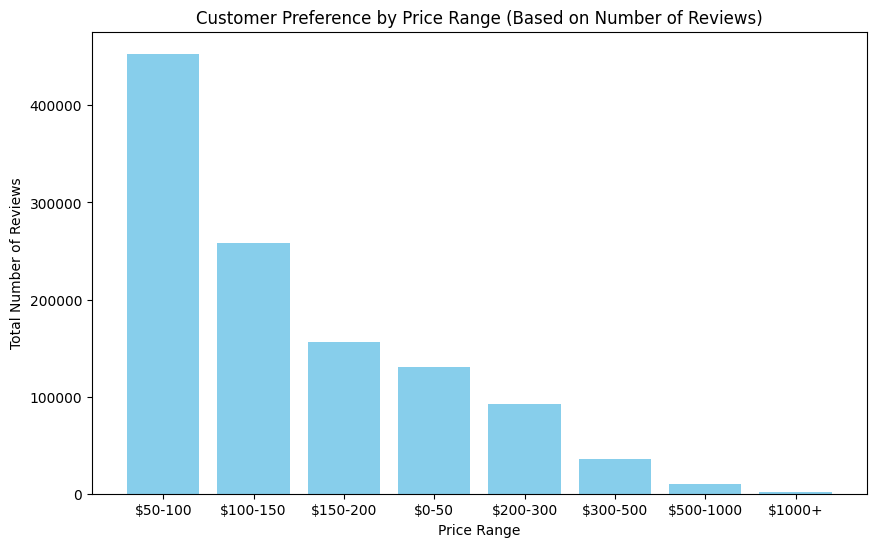

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(price_preference['price_range'], price_preference['number_of_reviews'], color='skyblue')
plt.title('Customer Preference by Price Range (Based on Number of Reviews)')
plt.xlabel('Price Range')
plt.ylabel('Total Number of Reviews')
plt.show()


In [26]:
'''Majority  of bookings occur in the ($50 - $100).price range.
oA significant portion opts for budget options $100 - $150 .'''

'Majority  of bookings occur in the ($50 - $100).price range.\noA significant portion opts for budget options $100 - $150 .'

**What are the types of properties that are most successful and least successful for FLH?**

In [27]:
# Grouping by room type and calculating the required metrics
property_type_analysis = data.groupby('room_type').agg({
    'id': 'count',  # Number of listings
    'number_of_reviews': 'sum',  # Total number of reviews
    'availability_365': 'mean'  # Average availability
}).reset_index()


In [28]:
# Renaming columns for clarity
property_type_analysis.rename(columns={
    'id': 'number_of_listings',
    'number_of_reviews': 'total_reviews',
    'availability_365': 'average_availability'
}, inplace=True)

In [29]:
# Sorting by the number of reviews to identify popular property types
successful_property_types = property_type_analysis.sort_values(by='total_reviews', ascending=False)

# Displaying the results
print(successful_property_types)

         room_type  number_of_listings  total_reviews  average_availability
0  Entire home/apt               25409         580403            111.920304
1     Private room               22326         538346            111.203933
2      Shared room                1160          19256            162.000862


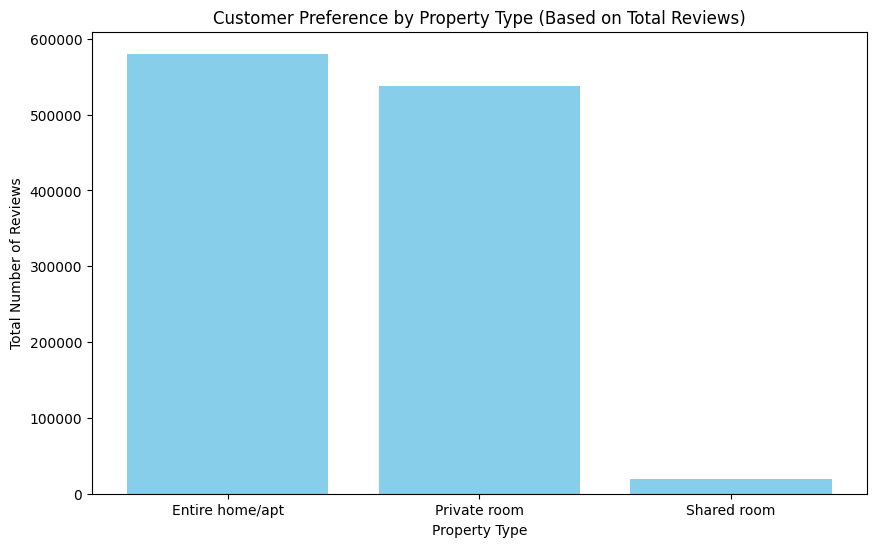

In [30]:
# Visualization: Bar plot of total reviews per property type
plt.figure(figsize=(10, 6))
plt.bar(successful_property_types['room_type'], successful_property_types['total_reviews'], color='skyblue')
plt.title('Customer Preference by Property Type (Based on Total Reviews)')
plt.xlabel('Property Type')
plt.ylabel('Total Number of Reviews')
plt.show()

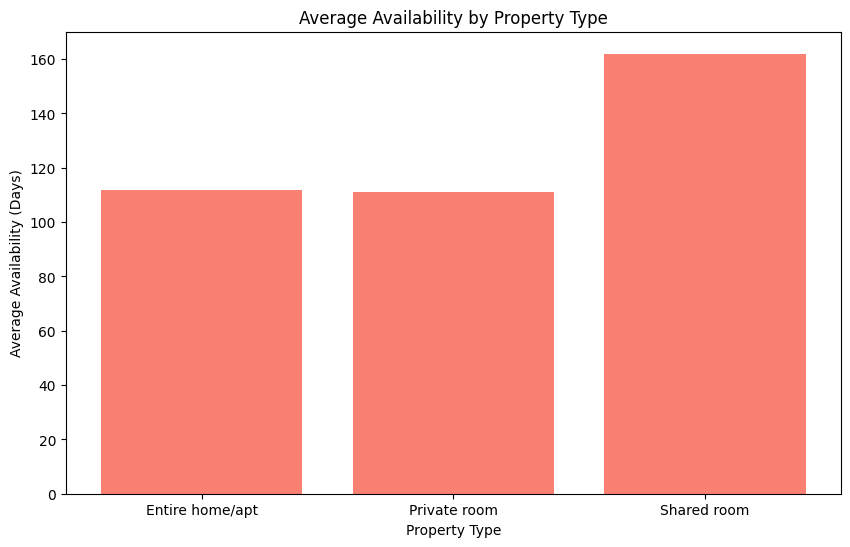

In [31]:
# Visualization: Bar plot of average availability per property type
plt.figure(figsize=(10, 6))
plt.bar(successful_property_types['room_type'], successful_property_types['average_availability'], color='salmon')
plt.title('Average Availability by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Availability (Days)')
plt.show()


Interpretation:
Most Successful Property Types:

High Total Reviews: Indicates that these property types are popular and well-reviewed by customers.
Low Average Availability: Suggests that these property types are frequently booked, making them successful.
Least Successful Property Types:

Low Total Reviews: These property types may not be as popular or appealing to customers.
High Average Availability: Suggests these properties are not frequently booked, indicating lower demand.
Summary:
By analyzing the room_type, FLH can determine which property types (e.g., Entire home/apt, Private room)
are driving the most customer engagement and bookings.
This insight allows the company to focus on promoting successful property types while improving
or rethinking the strategy for less successful ones.

In [32]:
'''Entire Homes and Apartments have the highest occupancy and ratings.
Shared Rooms underperform significantly.'''

'Entire Homes and Apartments have the highest occupancy and ratings.\nShared Rooms underperform significantly.'

**What are customers looking for most in their stays with FLH?**

In [33]:
# Correlation analysis to see which factors influence the number of reviews
correlation_matrix = data[['price', 'minimum_nights', 'availability_365', 'number_of_reviews']].corr()
print(correlation_matrix)


                      price  minimum_nights  availability_365  \
price              1.000000        0.042799          0.081829   
minimum_nights     0.042799        1.000000          0.144303   
availability_365   0.081829        0.144303          1.000000   
number_of_reviews -0.047954       -0.080116          0.172028   

                   number_of_reviews  
price                      -0.047954  
minimum_nights             -0.080116  
availability_365            0.172028  
number_of_reviews           1.000000  


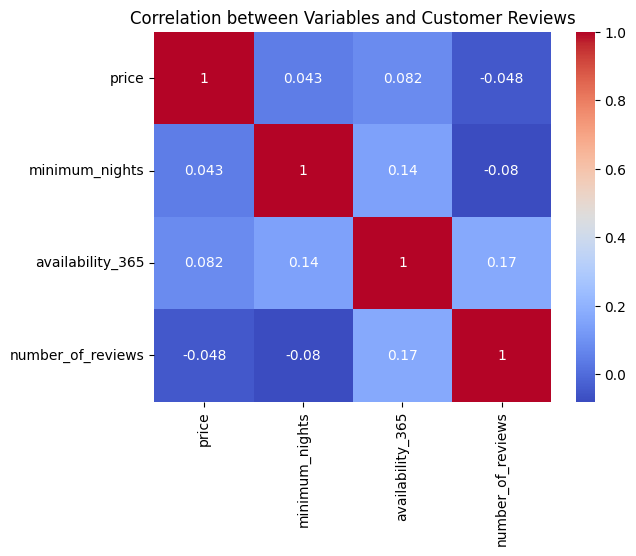

In [34]:
import seaborn as sns
# Visualize correlation with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables and Customer Reviews')
plt.show()

In [35]:
# Analyzing customer preferences by room type and price range
room_type_preference = data.groupby('room_type').agg({
    'number_of_reviews': 'mean',  # Average number of reviews
    'price': 'mean',  # Average price
    'availability_365': 'mean'  # Average availability
}).reset_index()

print(room_type_preference)

         room_type  number_of_reviews       price  availability_365
0  Entire home/apt          22.842418  211.794246        111.920304
1     Private room          24.112962   89.780973        111.203933
2      Shared room          16.600000   70.127586        162.000862


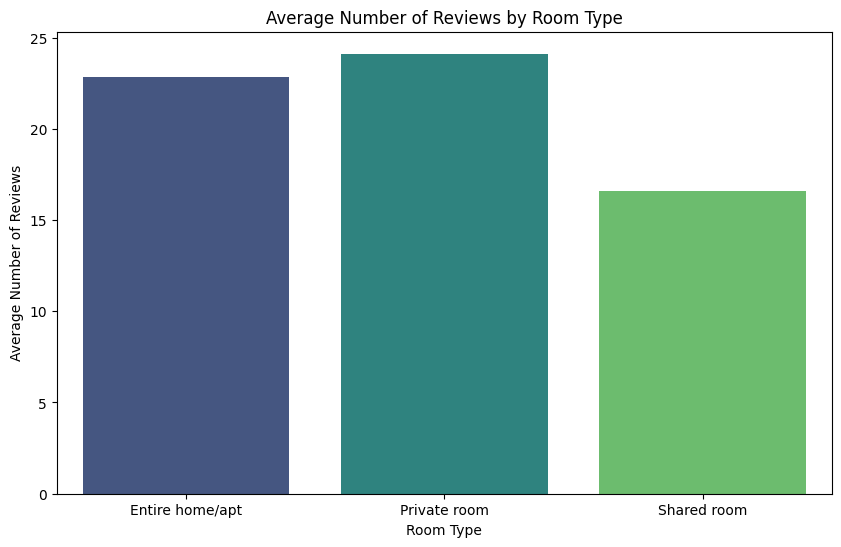

In [36]:
# Visualizing customer preferences by room type
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='number_of_reviews', data=room_type_preference, palette='viridis')
plt.title('Average Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Reviews')
plt.show()

In [37]:
# Analyzing preferences by neighborhood
neighborhood_preference = data.groupby('neighbourhood').agg({
    'number_of_reviews': 'mean',
    'price': 'mean',
    'availability_365': 'mean'
}).reset_index()

# Top 10 neighborhoods by average number of reviews
top_neighborhoods = neighborhood_preference.sort_values(by='number_of_reviews', ascending=False).head(10)
print(top_neighborhoods)


           neighbourhood  number_of_reviews       price  availability_365
177          Silver Lake         118.500000   70.000000        162.000000
59         East Elmhurst          81.659459   81.183784        169.491892
165         Richmondtown          79.000000   78.000000        300.000000
69           Eltingville          76.000000  141.666667        193.000000
135           Mount Eden          70.000000   58.500000        136.166667
183  Springfield Gardens          69.094118   94.235294        204.011765
194        Tompkinsville          57.142857   76.190476        209.428571
101             Huguenot          55.666667  118.333333        208.000000
120      Manhattan Beach          50.625000  103.500000        205.625000
96            Highbridge          48.814815   71.111111        158.555556


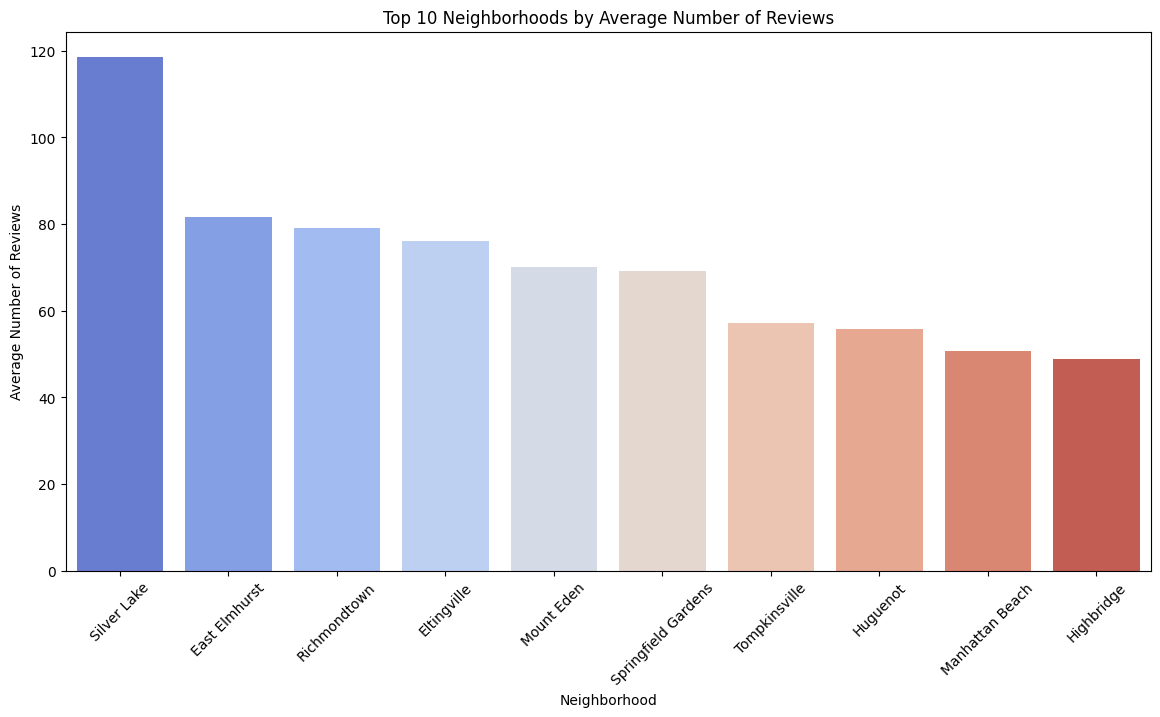

In [38]:
# Visualization: Average reviews by neighborhood
plt.figure(figsize=(14, 7))
sns.barplot(x='neighbourhood', y='number_of_reviews', data=top_neighborhoods, palette='coolwarm')
plt.title('Top 10 Neighborhoods by Average Number of Reviews')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45)
plt.show()

**What attributes do the hosts have that FLH should target to add to their service to increase revenue?**

In [39]:
# Calculate the number of listings per host
host_listing_counts = data.groupby('host_name_id').size().reset_index(name='listings_count')

# Calculate the average number of reviews per host
host_reviews = data.groupby('host_name_id').agg({
    'number_of_reviews': 'mean',
}).reset_index()

# Merge these two dataframes
host_analysis = pd.merge(host_listing_counts, host_reviews, on='host_name_id')


In [40]:
import seaborn as sns

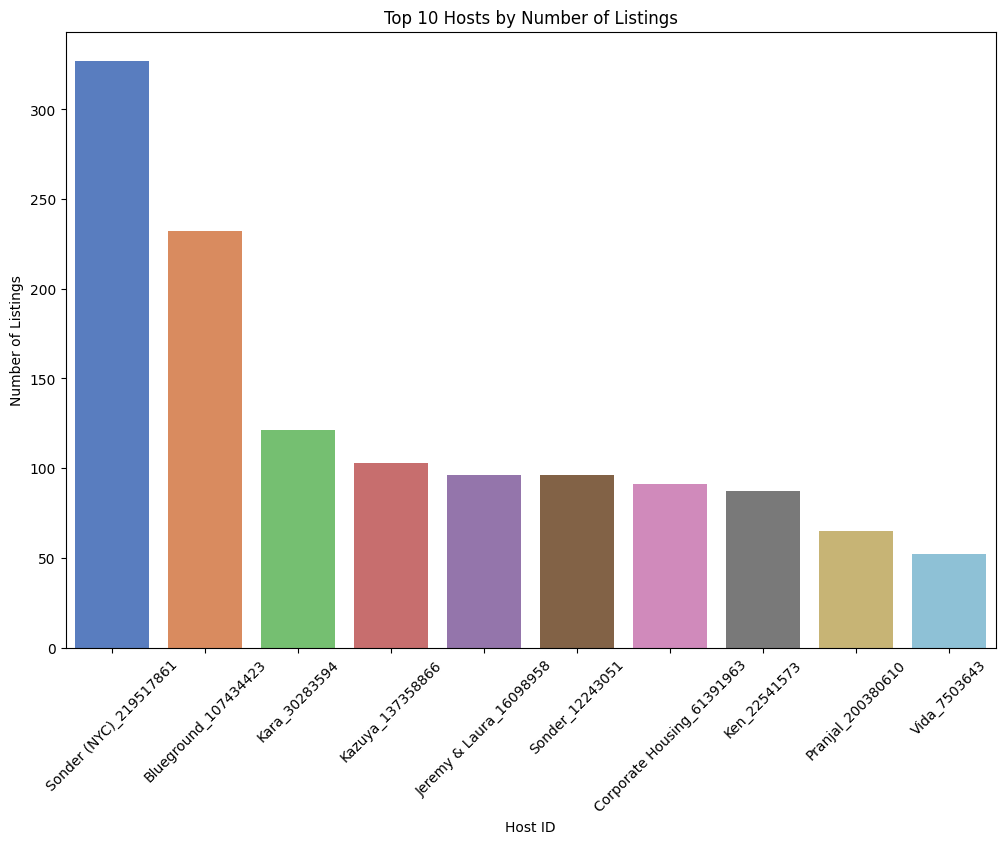

In [41]:
# 1. Bar Plot: Number of listings per host
plt.figure(figsize=(12, 8))
top_hosts_listings = host_listing_counts.sort_values(by='listings_count', ascending=False).head(10)
sns.barplot(x='host_name_id', y='listings_count', data=top_hosts_listings, palette='muted')
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

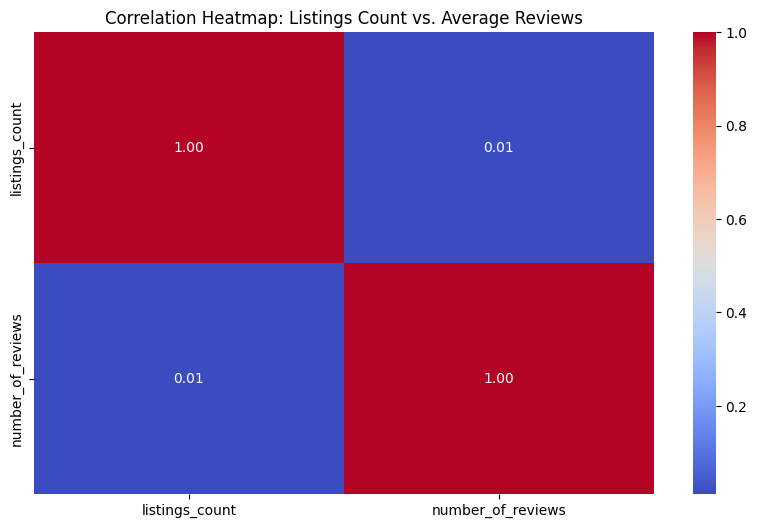

In [42]:
# 2. Heatmap: Correlation between listings count and average reviews
plt.figure(figsize=(10, 6))
sns.heatmap(host_analysis.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Listings Count vs. Average Reviews')
plt.show()

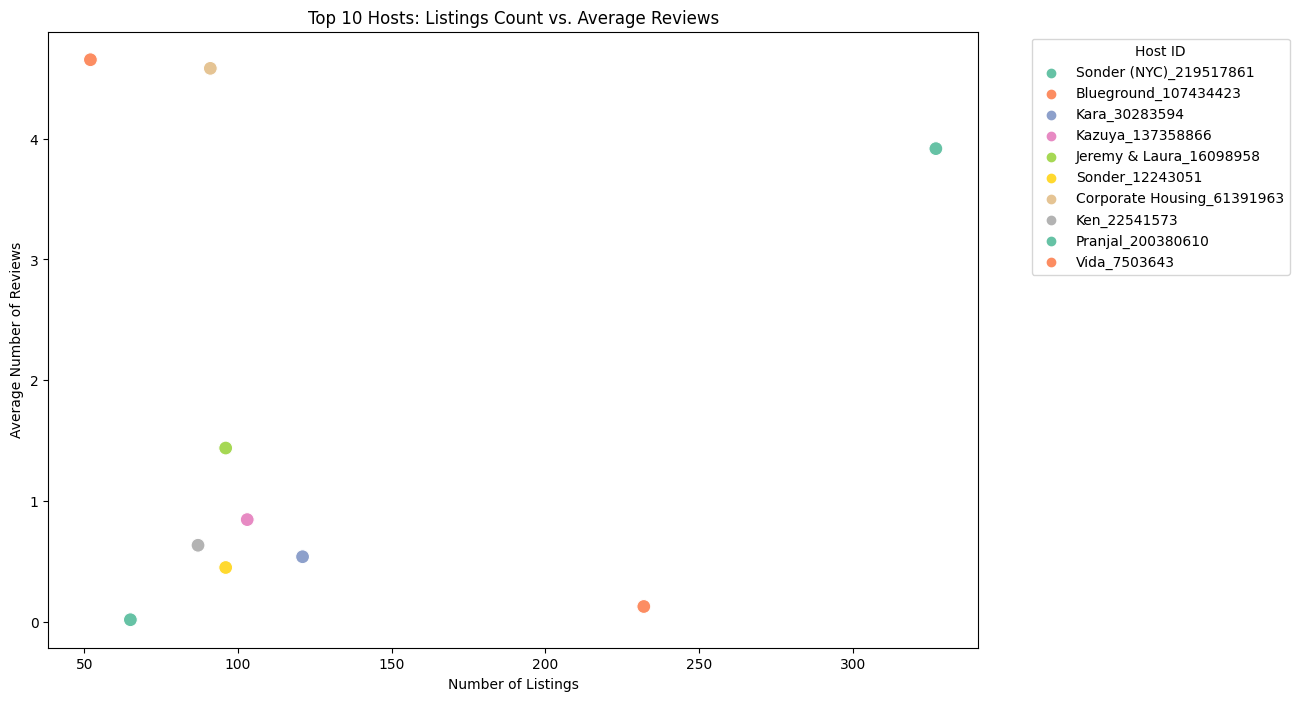

In [44]:

# 3. Scatter Plot: Listings count vs. Average reviews for top hosts
top_hosts_reviews = host_analysis.sort_values(by=['listings_count', 'number_of_reviews'], ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='listings_count', y='number_of_reviews', data=top_hosts_reviews, hue='host_name_id', palette='Set2', s=100)
plt.title('Top 10 Hosts: Listings Count vs. Average Reviews')
plt.xlabel('Number of Listings')
plt.ylabel('Average Number of Reviews')
plt.legend(title='Host ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**How to get unpopular properties more traction?**

In [45]:
# 1. Define unpopular properties based on low reviews and high availability
unpopular_properties = data[(data['number_of_reviews'] < 5) & (data['availability_365'] > 300)]

# 2. Analyzing unpopular properties by neighborhood
top_neighborhoods = unpopular_properties['neighbourhood'].value_counts().head(10)


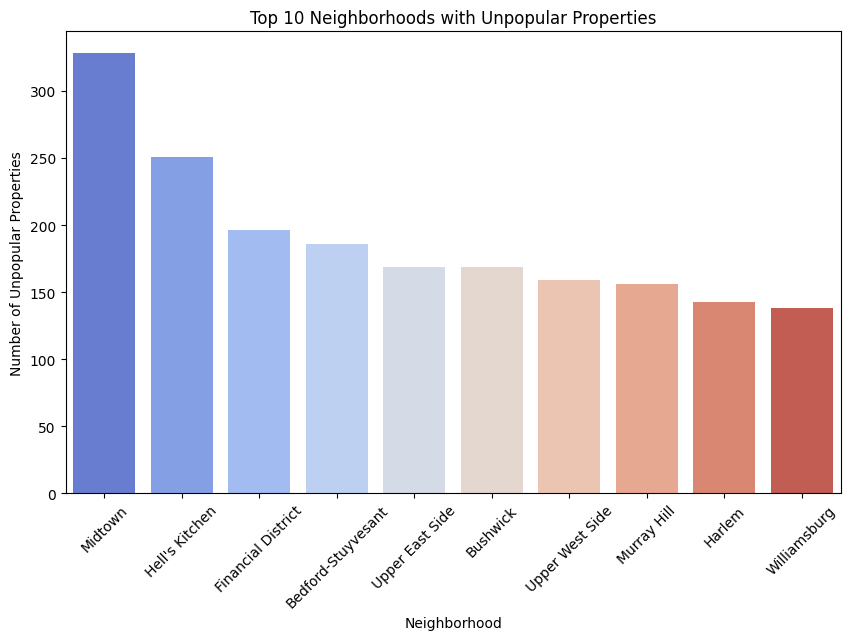

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='coolwarm')
plt.title('Top 10 Neighborhoods with Unpopular Properties')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Unpopular Properties')
plt.xticks(rotation=45)
plt.show()


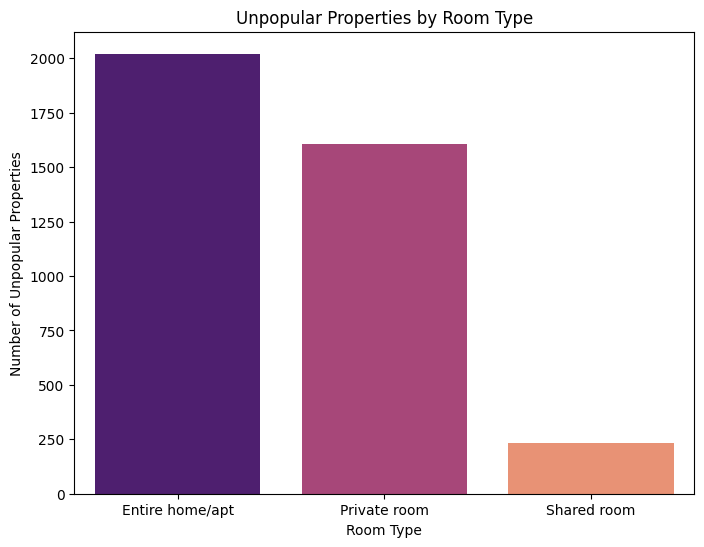

In [47]:
# 3. Analyzing unpopular properties by property type
property_type_counts = unpopular_properties['room_type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=property_type_counts.index, y=property_type_counts.values, palette='magma')
plt.title('Unpopular Properties by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Unpopular Properties')
plt.show()

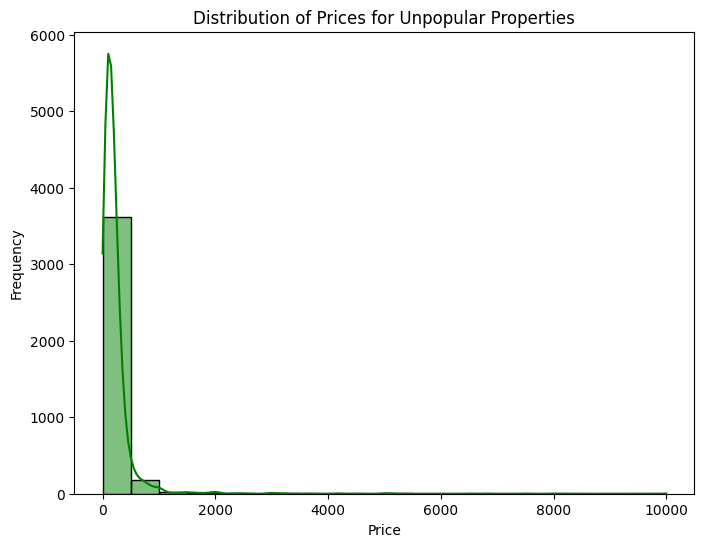

In [48]:
# 4. Analyzing average pricing of unpopular properties
plt.figure(figsize=(8, 6))
sns.histplot(unpopular_properties['price'], bins=20, kde=True, color='green')
plt.title('Distribution of Prices for Unpopular Properties')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Room Type Demand by Month:
room_type  Entire home/apt  Private room  Shared room
month                                                
1                     1854          1616           78
2                     1337          1130           42
3                     1225          1026           49
4                     1385          1174           59
5                     2437          2325          113
6                     6272          5232          281
7                     1169          1078           32
8                     1076           908           44
9                      927           854           47
10                     857           847           38
11                     751           607           20
12                    1042           868           43


C:\Users\udeva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-10-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\udeva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-05-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\udeva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-11-2018' in DD/MM/YYYY format. Provide format o

<Figure size 1200x800 with 0 Axes>

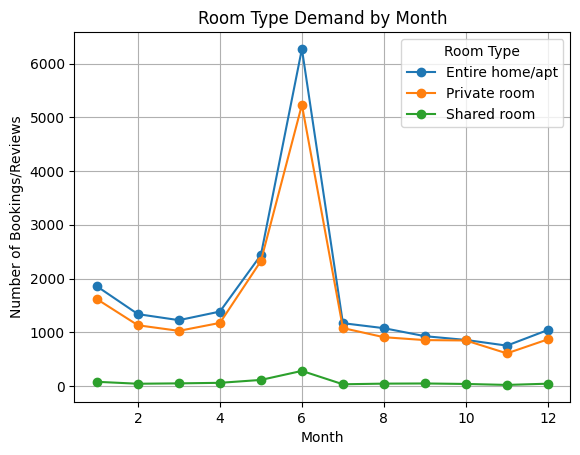

In [51]:
# Check if 'date' or 'review_date' column exists
if 'last_review' in data.columns:
    date_column = 'last_review'
elif 'last_review' in data.columns:
    date_column = 'review_date'
else:
    raise ValueError("No date or review_date column found in the dataset.")

# Convert the date column to datetime format
data[date_column] = pd.to_datetime(data[date_column], errors='coerce')

# Drop rows with invalid dates (if any)
data = data.dropna(subset=[date_column])

# Extract month from the date
data['month'] = data[date_column].dt.month

# Group by Month and Room Type
room_demand = data.groupby(['month', 'room_type']).size().unstack(fill_value=0)

print("Room Type Demand by Month:")
print(room_demand)

# Plot the demand for room types across different months
plt.figure(figsize=(12, 8))
room_demand.plot(kind='line', marker='o')
plt.title('Room Type Demand by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings/Reviews')
plt.legend(title='Room Type')
plt.grid(True)
plt.show()